**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

In this exploratory data analysis, I will use python to determine whether movie lengths are getting shorter over time and explain some constributing factors to this if any.


I used the dataset `netflix_data.csv`  with the following column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [62]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt 

In [63]:
# Load data and store as a dataframe
netflix_df = pd.read_csv("netflix_data.csv")
netflix_df.head() #check work

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [64]:
#Filter data to remove TV shows
netflix_subset = netflix_df["type"] == "Movie"
netflix_subset = netflix_df[netflix_subset]
netflix_subset.head() #check work

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,95,"After an awful accident, a couple admitted to ...",Horror Movies


In [65]:
#Investigate Netflix movie data keeping only the columns title, country, genre, release_year, duration into a new dataframe
netflix_movies = netflix_subset[["title", "country", "genre", "release_year", "duration"]]
netflix_movies.head() #check work

,title,country,genre,release_year,duration
1,7:19,Mexico,Dramas,2016,93
2,23:59,Singapore,Horror Movies,2011,78
3,9,United States,Action,2009,80
4,21,United States,Dramas,2008,123
6,122,Egypt,Horror Movies,2019,95


In [ ]:
#Filter netflix_movies to find movies that a strictly shorter than 60 minutes into a new dataframe. Analyze results
short_movies = netflix_movies[netflix_movies["duration"] < 60]
short_movies.head(25) #check work

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
162,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
171,A Family Reunion Christmas,United States,Uncategorized,2019,29
177,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
178,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22
179,A Go! Go! Cory Carson Summer Camp,NaN,Children,2020,21


A lot of the shorter movies tend to be documentaries, childrens movies, and stand up movies. There are a few genres but the majority make since that they are short due to the type of genre they fall under

In [67]:
#Assign colors to the genre groups of the data
colors = []
for lab, row in netflix_movies.iterrows():
    if row['genre'] == "Children":
        colors.append("Blue") 
    elif row['genre'] == "Documentaries":
        colors.append("Red")
    elif row['genre'] == "Stand-Up":
        colors.append("Green")
    else:
        colors.append("Orange")

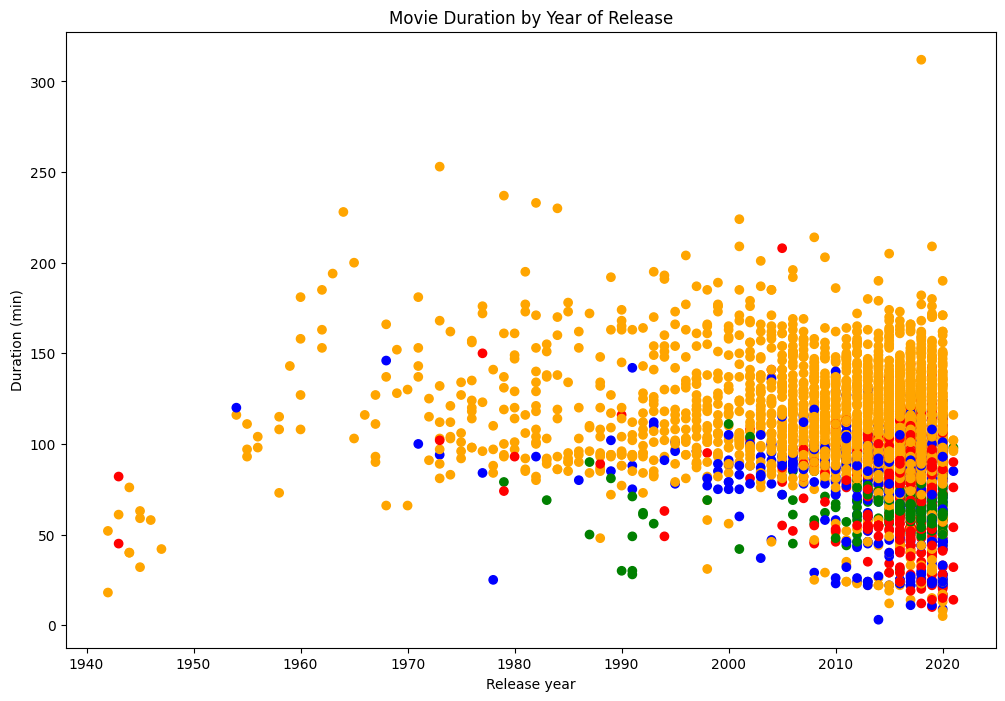

In [71]:
#Visualize data showing movie duration by year of release and diffierentiated by color
fig = plt.figure(figsize=(12,8))
plt.scatter(x = netflix_movies['release_year'], y = netflix_movies['duration'],c = colors)
plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.title('Movie Duration by Year of Release')

plt.show()

## Conclusion
There is no clear evidence that movies durations are getting shorter over time. Due to the differences in genre, short durations are determined to be linked to documentaries, stand-up comedies, and childrens movies. Accoring to the visualization, other genres (orange) are consistent in the 100 min - 175 min duration overtime.